# Written by Yixuan Tang
### NYU CUSP PUI
### Assignment 3 Homework 3

In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import scipy
from scipy.stats import norm
import os

%pylab inline

if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")

os.getenv("PUIDATA")

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['norm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


'/home/cusp/yt1369/PUIdata'

In [2]:
os.system("curl -O https://raw.githubusercontent.com/fedhere/PUI2017_fb55/master/Lab3_fb55/times.txt")
os.system("mv " + "times.txt " + os.getenv("PUIDATA"))

0

# IDEA:
## The new bus route improved commute
# NULL HYPOTHESIS:
## The commute time is the same or longer with thge new bus route as it was before

# ALTERNATIVE HYPOTHESIS:
## The commute time is shorter with the new bus route as it was before
# _$H_0$_ : $Tnew >= Told$
# _$H_1$_ : $Tnew < Told$


## I will use a significance level  $\alpha=0.05$

#### which means i want the probability of getting a result at least as significant as mine to be less then 5%

In [3]:
data = pd.read_csv(os.getenv("PUIDATA") + "/" + 'times.txt', header=None, squeeze=True)

In [4]:
mean = data.mean()
mean


34.466161688299998

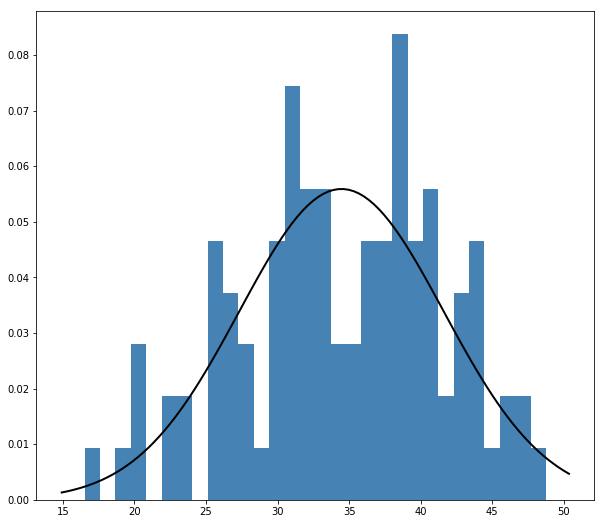

In [5]:
pl.figure(figsize=(10, 9))
pl.hist(data, bins=30, normed=True, color='SteelBlue')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = scipy.stats.norm.pdf(x, data.mean(), data.std())
pl.plot(x, p, 'k', linewidth=2)
pl.show()

# Use Z-test

# Formula: $Z = \frac{\mu_{pop} - \mu_{sample}}{\sigma / \sqrt{N}}$

In [6]:
#Now let's calculate the value of Z-statistic
Z = (36 - mean) / (6 / np.sqrt(len(data)))
Z

2.5563971861666701

## Since the significant threshold a = 0.05, whose limit is 1.96 sigma,
## the value of Z-test is 2.55 which is much bigger than 1.96, so the possibility of $H_0$ is less than 5%,
## so we can denied the Null hyphothesis and get the conclusion:
# The new bus route improved commute!